In [2]:
"""import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,AdamW
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import Callback,EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import pandas as pd

# Load the dataset
file_path = 'D:/aaaaaa/exported_dataset.xlsx'
df = pd.read_excel(file_path)

# Prepare features (X) and labels (Y)
X = df.drop(['Max Rising Slope', 'Soak Time', 'Reflow Time', 'Peak Temp'], axis=1)  # Drop target columns from features
Y = df[['Max Rising Slope']]  # Multi-output labels

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Scale the features and labels
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, random_state=42)

# Custom callback to track R² score
class R2ScoreCallback(Callback):
    def __init__(self, X_val, Y_val):
        self.X_val = X_val
        self.Y_val = Y_val
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.X_val)
        predictions = scaler_Y.inverse_transform(predictions)
        Y_val_original = scaler_Y.inverse_transform(self.Y_val)
        r2 = r2_score(Y_val_original, predictions)
        self.r2_scores.append(r2)
        print(f"Epoch {epoch+1}: R² score = {r2}")

r2_callback = R2ScoreCallback(X_test, Y_test)

# Function to build the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer

    # Tune number of hidden layers (let's say between 1 to 3 hidden layers)
    num_layers = hp.Int('num_layers', min_value=2, max_value=8)

    # Add Dense layers dynamically based on the number of layers
    for i in range(num_layers):
        model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=16, max_value=1024, step=32), 
                        activation=hp.Choice(f'activation_layer_{i}', values=['relu', 'tanh'])))
        
        # Add Batch Normalization after each layer for faster convergence
        model.add(BatchNormalization())
        
        # Optionally add Dropout layer after each Dense layer
        model.add(Dropout(rate=hp.Float(f'dropout_layer_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer for multi-output regression (unchanged)
    model.add(Dense(1))  # Output for 4 labels

    # Compile model with optimizer options and learning rate scheduling
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'adamw'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'adamw':
        optimizer = AdamW(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Set up the Keras Tuner with Bayesian Optimization
tuner = RandomSearch(
    build_model,            # Function that builds the model
    objective='val_loss',    # Targeting validation loss
    max_trials=100,          # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to build for each combination (averaged performance)
    directory='keras_tuner_dir',
    project_name='max_rising_slope_tuning'
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Search for the best model
tuner.search(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), 
             callbacks=[r2_callback], batch_size=128)

# Get the best model found by Keras Tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Print the architecture of the best model
best_model.summary()

# Evaluate the model on the test set
loss = best_model.evaluate(X_test, Y_test)
print(f'Best model test loss: {loss}')

# Make predictions on the test set using the best model
predictions_scaled = best_model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler_Y.inverse_transform(predictions_scaled)
Y_test_original = scaler_Y.inverse_transform(Y_test)

# Print a few predictions and actual values in their original (unscaled) form
for i in range(10):
    print(f"Predicted: {predictions[i]}, Actual: {Y_test_original[i]}")

# Retrieve and display the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")"""

Trial 100 Complete [00h 01m 20s]
val_loss: 0.026820141822099686

Best val_loss So Far: 0.022430596873164177
Total elapsed time: 02h 58m 50s


c:\Users\ASM PROCESS ENGINE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 464)            │         9,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 464)            │         1,856 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 464)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 944)            │       438,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 944)            │         3,776 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 944)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 848)            │       801,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 848)            │         3,392 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 848)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 752)            │       638,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 752)            │         3,008 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 752)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           753 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,901,297 (7.25 MB)

 Trainable params: 1,895,281 (7.23 MB)

 Non-trainable params: 6,016 (23.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0196
Best model test loss: 0.019604315981268883
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
Predicted: [2.203758], Actual: [2.27]
Predicted: [2.0210474], Actual: [1.79]
Predicted: [2.2035668], Actual: [2.22]
Predicted: [2.2615016], Actual: [1.83]
Predicted: [2.1904252], Actual: [2.08]
Predicted: [2.1543522], Actual: [2.4]
Predicted: [2.2469723], Actual: [2.22]
Predicted: [1.9611148], Actual: [1.72]
Predicted: [2.2329009], Actual: [2.26]
Predicted: [2.2061517], Actual: [2.25]
Best hyperparameters: {'num_layers': 4, 'units_layer_0': 464, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.1, 'units_layer_1': 944, 'activation_layer_1': 'tanh', 'dropout_layer_1': 0.4, 'optimizer': 'adamw', 'learning_rate': 0.007767123385994891, 'units_layer_2': 848, 'activation_layer_2': 'tanh', 'dropout_layer_2': 0.1, 'units_layer_3': 752, 'activation_layer_3': 'tanh', 'dropout_layer_3': 0.5, 'units_layer_4': 688, 'activation_layer_4': 'relu', 'dropout_layer_4': 0.4

In [1]:
"""import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,AdamW
from keras_tuner import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import Callback,EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import pandas as pd

# Load the dataset
file_path = 'D:/aaaaaa/exported_dataset.xlsx'
df = pd.read_excel(file_path)

# Prepare features (X) and labels (Y)
X = df.drop(['Max Rising Slope', 'Soak Time', 'Reflow Time', 'Peak Temp','SilkScreen_0','SilkScreen_1'], axis=1)  # Drop target columns from features
Y = df[['Max Rising Slope']]  # Multi-output labels

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Scale the features and labels
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, random_state=42)

# Custom callback to track R² score
class R2ScoreCallback(Callback):
    def __init__(self, X_val, Y_val):
        self.X_val = X_val
        self.Y_val = Y_val
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.X_val)
        predictions = scaler_Y.inverse_transform(predictions)
        Y_val_original = scaler_Y.inverse_transform(self.Y_val)
        r2 = r2_score(Y_val_original, predictions)
        self.r2_scores.append(r2)
        print(f"Epoch {epoch+1}: R² score = {r2}")

r2_callback = R2ScoreCallback(X_test, Y_test)

# Function to build the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer

    # Tune number of hidden layers (let's say between 1 to 3 hidden layers)
    num_layers = hp.Int('num_layers', min_value=2, max_value=8)

    # Add Dense layers dynamically based on the number of layers
    for i in range(num_layers):
        model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=16, max_value=1024, step=32), 
                        activation=hp.Choice(f'activation_layer_{i}', values=['relu', 'tanh'])))
        
        # Add Batch Normalization after each layer for faster convergence
        model.add(BatchNormalization())
        
        # Optionally add Dropout layer after each Dense layer
        model.add(Dropout(rate=hp.Float(f'dropout_layer_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer for multi-output regression (unchanged)
    model.add(Dense(1))  # Output for 4 labels

    # Compile model with optimizer options and learning rate scheduling
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'adamw'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'adamw':
        optimizer = AdamW(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Set up the Keras Tuner with Bayesian Optimization
tuner = BayesianOptimization(
    build_model,            # Function that builds the model
    objective='val_loss',    # Targeting validation loss
    max_trials=200,          # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to build for each combination (averaged performance)
    directory='keras_tuner_dir',
    project_name='max_rising_slope_tuning_2'
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Search for the best model
tuner.search(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test), 
             callbacks=[r2_callback, reduce_lr, early_stopping], batch_size=128)

# Get the best model found by Keras Tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Print the architecture of the best model
best_model.summary()

# Evaluate the model on the test set
loss = best_model.evaluate(X_test, Y_test)
print(f'Best model test loss: {loss}')

# Make predictions on the test set using the best model
predictions_scaled = best_model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler_Y.inverse_transform(predictions_scaled)
Y_test_original = scaler_Y.inverse_transform(Y_test)

# Print a few predictions and actual values in their original (unscaled) form
for i in range(10):
    print(f"Predicted: {predictions[i]}, Actual: {Y_test_original[i]}")

# Retrieve and display the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")"""

Trial 200 Complete [00h 00m 12s]
val_loss: 0.028129037469625473

Best val_loss So Far: 0.024756007827818394
Total elapsed time: 03h 26m 18s


c:\Users\ASM PROCESS ENGINE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 272)            │         5,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 272)            │         1,088 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 272)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1008)           │       275,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1008)           │         4,032 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,009 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,481 (1.09 MB)

 Trainable params: 283,921 (1.08 MB)

 Non-trainable params: 2,560 (10.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0242
Best model test loss: 0.024171728640794754
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted: [2.2350464], Actual: [2.27]
Predicted: [2.1880527], Actual: [1.79]
Predicted: [1.9615892], Actual: [2.22]
Predicted: [2.2109478], Actual: [1.83]
Predicted: [2.0445423], Actual: [2.08]
Predicted: [2.166354], Actual: [2.4]
Predicted: [2.2165306], Actual: [2.22]
Predicted: [2.173212], Actual: [1.72]
Predicted: [2.1445882], Actual: [2.26]
Predicted: [2.1745632], Actual: [2.25]
Best hyperparameters: {'num_layers': 2, 'units_layer_0': 272, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.5, 'units_layer_1': 1008, 'activation_layer_1': 'relu', 'dropout_layer_1': 0.2, 'optimizer': 'rmsprop', 'learning_rate': 0.01, 'units_layer_2': 16, 'activation_layer_2': 'tanh', 'dropout_layer_2': 0.2, 'units_layer_3': 752, 'activation_layer_3': 'tanh', 'dropout_layer_3': 0.5, 'units_layer_4': 144, 'activation_layer_4': 'relu', 'dropout_layer_4': 0.5, 'units_lay

In [1]:
"""import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,AdamW,SGD,Adagrad
from keras_tuner import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import Callback,EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import pandas as pd

# Load the dataset
file_path = 'D:/aaaaaa/exported_dataset.xlsx'
df = pd.read_excel(file_path)

# Prepare features (X) and labels (Y)
X = df.drop(['Max Rising Slope', 'Soak Time', 'Reflow Time', 'Peak Temp','SilkScreen_0','SilkScreen_1'], axis=1)  # Drop target columns from features
Y = df[['Max Rising Slope']]  # Multi-output labels

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Scale the features and labels
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, random_state=42)

# Custom callback to track R² score
class R2ScoreCallback(Callback):
    def __init__(self, X_val, Y_val):
        self.X_val = X_val
        self.Y_val = Y_val
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.X_val)
        predictions = scaler_Y.inverse_transform(predictions)
        Y_val_original = scaler_Y.inverse_transform(self.Y_val)
        r2 = r2_score(Y_val_original, predictions)
        self.r2_scores.append(r2)
        print(f"Epoch {epoch+1}: R² score = {r2}")

r2_callback = R2ScoreCallback(X_test, Y_test)

# Function to build the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer

    # Tune number of hidden layers (let's say between 1 to 3 hidden layers)
    num_layers = hp.Int('num_layers', min_value=2, max_value=5)

    # Add Dense layers dynamically based on the number of layers
    for i in range(num_layers):
        model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=64, max_value=1024, step=64), 
                        activation=hp.Choice(f'activation_layer_{i}', values=['relu', 'tanh'])))
        
        # Add Batch Normalization after each layer for faster convergence
        model.add(BatchNormalization())
        
        # Optionally add Dropout layer after each Dense layer
        model.add(Dropout(rate=hp.Float(f'dropout_layer_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer for multi-output regression (unchanged)
    model.add(Dense(1))  # Output for 4 labels

    # Compile model with optimizer options and learning rate scheduling
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'adamw', 'sgd', 'adagrad']) 

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'adamw':
        optimizer = AdamW(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'),
                        momentum=hp.Float('momentum', min_value=0.0, max_value=0.9, step=0.1))  # Added momentum for SGD
    elif optimizer_choice == 'adagrad':
        optimizer = Adagrad(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Set up the Keras Tuner with Bayesian Optimization
tuner = BayesianOptimization(
    build_model,            # Function that builds the model
    objective='val_loss',    # Targeting validation loss
    max_trials=150,          # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to build for each combination (averaged performance)
    directory='keras_tuner_dir',
    project_name='max_rising_slope_tuning_2'
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Search for the best model
tuner.search(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), 
             callbacks=[r2_callback, reduce_lr, early_stopping], batch_size=128)

# Get the best model found by Keras Tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Print the architecture of the best model
best_model.summary()

# Evaluate the model on the test set
loss = best_model.evaluate(X_test, Y_test)
print(f'Best model test loss: {loss}')

# Make predictions on the test set using the best model
predictions_scaled = best_model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler_Y.inverse_transform(predictions_scaled)
Y_test_original = scaler_Y.inverse_transform(Y_test)

# Print a few predictions and actual values in their original (unscaled) form
for i in range(10):
    print(f"Predicted: {predictions[i]}, Actual: {Y_test_original[i]}")

# Retrieve and display the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")"""

Trial 150 Complete [00h 00m 10s]
val_loss: 0.2808857858181

Best val_loss So Far: 0.025139384903013706
Total elapsed time: 02h 29m 22s


c:\Users\ASM PROCESS ENGINE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 912)            │        17,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 912)            │         3,648 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 912)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1008)           │       920,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1008)           │         4,032 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 304)            │       306,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 304)            │         1,216 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 304)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1008)           │       307,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1008)           │         4,032 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,009 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,565,745 (5.97 MB)

 Trainable params: 1,559,281 (5.95 MB)

 Non-trainable params: 6,464 (25.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.0240
Best model test loss: 0.023969868198037148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted: [2.3733106], Actual: [2.27]
Predicted: [2.1787508], Actual: [1.79]
Predicted: [2.1726217], Actual: [2.22]
Predicted: [2.2736816], Actual: [1.83]
Predicted: [2.193591], Actual: [2.08]
Predicted: [2.152157], Actual: [2.4]
Predicted: [2.257372], Actual: [2.22]
Predicted: [2.164738], Actual: [1.72]
Predicted: [2.197234], Actual: [2.26]
Predicted: [2.1723065], Actual: [2.25]
Best hyperparameters: {'num_layers': 4, 'units_layer_0': 912, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.5, 'units_layer_1': 1008, 'activation_layer_1': 'tanh', 'dropout_layer_1': 0.1, 'optimizer': 'adamw', 'learning_rate': 0.00023657326484406444, 'units_layer_2': 304, 'activation_layer_2': 'tanh', 'dropout_layer_2': 0.4, 'units_layer_3': 1008, 'activation_layer_3': 'relu', 'dropout_layer_3': 0.2, 'momentum': 0.7000000000000001, 'units_layer_4': 592, 'activation_layer

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import Callback
import pandas as pd
import pickle 

In [2]:
file_path = 'D:/bla bla/exported_dataset_New.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Prepare features (X) and labels (Y)
X = df.drop(['Max Rising Slope', 'Soak Time', 'Reflow Time', 'Peak Temp'], axis=1)  # Drop target columns from features
Y = df[['Max Rising Slope']]  # Multi-output labels

In [4]:
# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Scale the features and labels
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

In [5]:
# Save the **fitted** scalers using pickle after fitting (not the scaled data)
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

with open('scaler_Y.pkl', 'wb') as f:
    pickle.dump(scaler_Y, f)

In [5]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, random_state=42)

In [6]:
# Define the custom callback to track R² score
class R2ScoreCallback(Callback):
    def __init__(self, X_val, Y_val):
        self.X_val = X_val
        self.Y_val = Y_val
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.X_val)  # Predict on validation set
        predictions = scaler_Y.inverse_transform(predictions)  # Inverse transform predictions
        Y_val_original = scaler_Y.inverse_transform(self.Y_val)  # Inverse transform actual values
        r2 = r2_score(Y_val_original, predictions)  # Calculate R² score
        self.r2_scores.append(r2)  # Save R² score
        print(f"Epoch {epoch+1}: R² score = {r2}")

In [7]:
# Instantiate the R² score callback
r2_callback = R2ScoreCallback(X_test, Y_test)

In [8]:
# Define the model
model = Sequential()

# Layer 0: 416 units, Tanh activation, 0.4 dropout
model.add(Dense(608, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))

# Layer 1: 768 units, Tanh activation, 0.5 dropout
model.add(Dense(896, activation='tanh'))
model.add(Dropout(0.4))

# Layer 2: 96 units, ReLU activation, 0.2 dropout
model.add(Dense(832, activation='tanh'))
model.add(Dropout(0.4))

# Layer 3: 768 units, Tanh activation, 0.5 dropout
model.add(Dense(704, activation='relu'))
model.add(Dropout(0.4))

# Layer 4: 96 units, ReLU activation, 0.2 dropout
model.add(Dense(288, activation='relu'))
model.add(Dropout(0.2))

# Output layer: Assuming this is a regression task with 1 output
model.add(Dense(1))

In [9]:
# Compile the model with Adam optimizer and the provided learning rate
optimizer = Adam(learning_rate=0.0025281553292309227)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [10]:
# Train the model and track history and R² score
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test),callbacks=[r2_callback])

Epoch 1/50

1/1 [==============================] - 0s 151ms/steps: 1.40
Epoch 1: R² score = -2.3895665661831234
9/9 [==============================] - 3s 129ms/step - loss: 1.4051 - val_loss: 0.0915
Epoch 2/50
1/1 [==============================] - 0s 28ms/stepss: 0.13
Epoch 2: R² score = -5.341141687367823
9/9 [==============================] - 1s 60ms/step - loss: 0.1320 - val_loss: 0.1712
Epoch 3/50
1/1 [==============================] - 0s 74ms/stepss: 0.08
Epoch 3: R² score = -1.7283589554023315
9/9 [==============================] - 1s 70ms/step - loss: 0.0844 - val_loss: 0.0737
Epoch 4/50
1/1 [==============================] - 0s 27ms/stepss: 0.06
Epoch 4: R² score = -2.553713038765795
9/9 [==============================] - 0s 56ms/step - loss: 0.0657 - val_loss: 0.0959
Epoch 5/50
1/1 [==============================] - 0s 35ms/stepss: 0.06
Epoch 5: R² score = -1.2664409635114304
9/9 [==============================] - 0s 54ms/step - loss: 0.0630 - val_loss: 0.0612
Epoch 6/50
1/1 

In [11]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}')

1/1 [==============================] - 0s 70ms/step - loss: 0.0393
Test loss: 0.03931036964058876


In [12]:
# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler_Y.inverse_transform(predictions_scaled)
Y_test_original = scaler_Y.inverse_transform(Y_test)

1/1 [==============================] - 0s 34ms/step


In [13]:
# Print a few predictions and actual values in their original (unscaled) form
for i in range(20):
    print(f"Predicted: {predictions[i]}, Actual: {Y_test_original[i]}")

Predicted: [2.1278734], Actual: [2.27]
Predicted: [2.1317587], Actual: [1.79]
Predicted: [1.8962872], Actual: [2.22]
Predicted: [2.259018], Actual: [1.83]
Predicted: [1.7954346], Actual: [2.08]
Predicted: [2.1522017], Actual: [2.4]
Predicted: [2.0481954], Actual: [2.22]
Predicted: [2.1411965], Actual: [1.72]
Predicted: [2.064062], Actual: [2.26]
Predicted: [2.1665401], Actual: [2.25]
Predicted: [1.9389107], Actual: [1.5]
Predicted: [2.1629446], Actual: [2.43]
Predicted: [1.9649812], Actual: [2.77]
Predicted: [1.8502415], Actual: [2.29]
Predicted: [2.304482], Actual: [2.53]
Predicted: [2.1437232], Actual: [1.93]
Predicted: [2.0994167], Actual: [2.27]
Predicted: [2.1572893], Actual: [2.37]
Predicted: [2.0865197], Actual: [2.43]
Predicted: [2.1018276], Actual: [2.57]


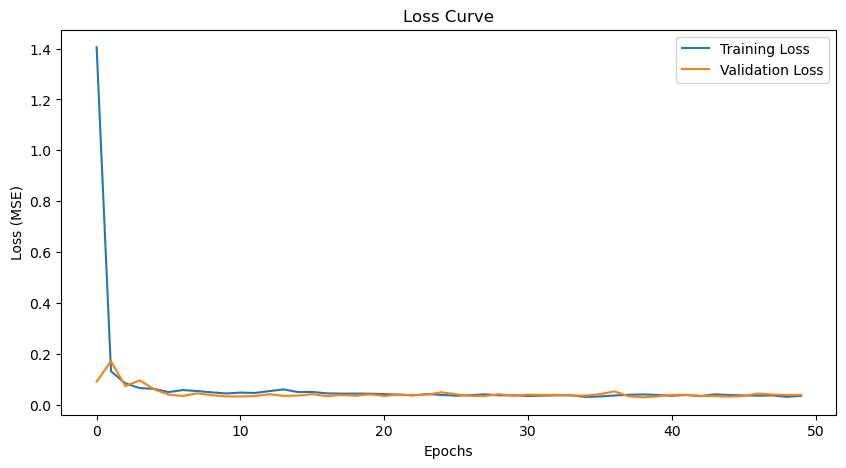

In [14]:
# Plot the loss curve (training and validation)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

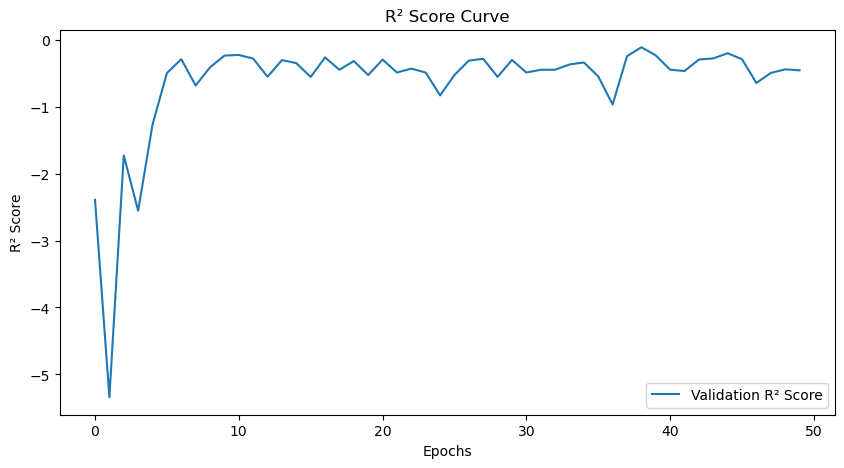

In [15]:
# Plot the R² score curve for validation set
plt.figure(figsize=(10, 5))
plt.plot(r2_callback.r2_scores, label='Validation R² Score')
plt.title('R² Score Curve')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.show()

In [ ]:
# Save the trained model to a file
model_save_path = 'D:/aaaaaa/Max_Rising_Slope.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")